In [1]:
%load_ext rpy2.ipython

from fig_builder import TwinsFiguresData, TwinsFigures
from fig_builder import umap
from plotnine import *
import pandas as pd
import warnings


warnings.filterwarnings('ignore')

fig_data = TwinsFiguresData()
figs = TwinsFigures(fig_data)

In [2]:
print('metadata')
fig_data.metadata()

metadata


,date,pma_treated,kind,subject,flight,during_flight,time_label
011515_TW_B,2015-01-15,False,buccal,TW,before,before,before
011515_TW_S,2015-01-15,False,saliva,TW,before,before,before
012015_HR_B,2015-01-20,False,buccal,HR,ground,before,before
012015_HR_S,2015-01-20,False,saliva,HR,ground,before,before
012016_HR_B,2016-01-20,False,buccal,HR,ground,flight,flight
...,...,...,...,...,...,...,...
IIIF3SW,2016-05-06,False,Surface,ISS,NaN,NaN,unknown
IIIF8SW_P,2016-05-06,True,Surface,ISS,NaN,NaN,unknown
IIIF5SW_P,2016-05-06,True,Surface,ISS,NaN,NaN,unknown
IIIF3SW_P,2016-05-06,True,Surface,ISS,NaN,NaN,unknown


In [3]:
fig_data.metadata()['subject'].unique()
fig_data.metadata().query('subject == "ISS-HEPA"')

,date,pma_treated,kind,subject,flight,during_flight,time_label


In [4]:
fig_data.iss.taxa_read_counts().loc['HEPA']['d__Bacteria|p__Proteobacteria|c__Gammaproteobacteria|o__Enterobacterales|f__Yersiniaceae|g__Serratia|s__Serratia proteamaculans']


15.0

In [5]:
print('species')
fig_data.species()

species


TypeError: taxa_read_counts() got an unexpected keyword argument 'logger'

In [ ]:
figs.taxa_umap_scatter()

In [ ]:
figs.taxa_pca_scatter()

In [9]:
%%R

library(ggthemes)
library(ggplot2)
library(reshape2)
library(gridExtra)
library(ALDEx2)
library(RColorBrewer)

In [46]:
twin_rcs = figs.twins.taxa_read_counts()
twin_rcs = twin_rcs.fillna(0)
twin_rcs.columns = [c.split('s__')[1] for c in twin_rcs.columns]

kinds = ['buccal', 'saliva', 'fecal']
persistents = figs.metadata().query('kind in @kinds')
persistents = persistents['flight']
persistents = persistents.map(lambda x: 'ground' if x not in ['flight', 'after'] else 'persistent')
persistent_taxa = twin_rcs.loc[persistents.index]
persistent_taxa = persistent_taxa.fillna(0)
persistent_taxa = persistent_taxa.loc[:,persistent_taxa.sum() > 0]
persistent_taxa = persistent_taxa.loc[persistent_taxa.sum(axis=1) > 0]
persistents = persistents[persistent_taxa.index]

persistent_taxa

,Homo sapiens,Thermothielavioides terrestris,Thermothelomyces thermophilus,Neurospora crassa,Pyricularia grisea,Pyricularia oryzae,Pyricularia pennisetigena,Fusarium pseudograminearum,Fusarium venenatum,Fusarium graminearum,...,Lactococcus virus bIL170,Lactococcus virus P008,Lactococcus virus ASCC273,Lactococcus virus ASCC532,Leuconostoc virus P793,Escherichia virus K1ind1,Bacillus virus Spock,Pantoea virus Limezero,Columbid alphaherpesvirus 1,Melegrivirus A
011515_TW_B,3439109.0,76.0,62.0,37.0,35.0,29.0,13.0,34.0,17.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
011515_TW_S,4587140.0,71.0,59.0,56.0,42.0,29.0,36.0,58.0,22.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
012015_HR_B,5870337.0,126.0,73.0,56.0,37.0,41.0,35.0,31.0,43.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
012015_HR_S,6314012.0,98.0,77.0,46.0,50.0,51.0,30.0,39.0,32.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
012016_HR_S,20076683.0,133.0,82.0,120.0,43.0,86.0,61.0,134.0,51.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
012715_TW_S,4694061.0,103.0,79.0,83.0,44.0,56.0,40.0,82.0,33.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
030116_TW_B,2957904.0,61.0,39.0,54.0,20.0,18.0,24.0,29.0,21.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
040616_TW_B,3498250.0,125.0,68.0,117.0,78.0,49.0,56.0,86.0,58.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
040616_TW_S,5020536.0,135.0,112.0,98.0,73.0,64.0,69.0,86.0,39.0,176.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
041015_TW_S,4965506.0,82.0,62.0,71.0,53.0,22.0,26.0,51.0,39.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
%%R -i persistent_taxa -i persistents

persistent_taxa_aldex = aldex(t(persistent_taxa), persistents)

[1] "aldex.clr: generating Monte-Carlo instances and clr values"
[1] "operating in serial mode"
[1] "computing center with all features"
[1] "aldex.ttest: doing t-test"
[1] "running tests for each MC instance:"
|------------(25%)----------(50%)----------(75%)----------|
[1] "aldex.effect: calculating effect sizes"
[1] "operating in serial mode"


In [48]:
%%R -o oral_persistent_taxa

sig = persistent_taxa_aldex[persistent_taxa_aldex$we.eBH < 0.05,]
oral_persistent_taxa = rownames(sig[sig$effect > 0,])
oral_persistent_taxa

[1] "Bacillus.sp..HBCD.sjtu"          "Geminocystis.herdmanii"         
[3] "Pseudoalteromonas.sp..DL.6"      "Marivivens.sp..JLT3646"         
[5] "Rickettsiales.bacterium.Ac37b"   "Chryseobacterium.indoltheticum" 
[7] "Nonlabens.dokdonensis"           "Planctomycetes.bacterium.HG15A2"
[9] "Shewanella.sp..FDAARGOS_354"    


In [49]:
oral_persistent_taxa = list(oral_persistent_taxa)
oral_persistent_taxa = [el.replace('.', ' ').replace('sp ', 'sp.') for el in oral_persistent_taxa]

oral_persistent_taxa

['Bacillus sp. HBCD sjtu',
 'Geminocystis herdmanii',
 'Pseudoalteromonas sp. DL 6',
 'Marivivens sp. JLT3646',
 'Rickettsiales bacterium Ac37b',
 'Chryseobacterium indoltheticum',
 'Nonlabens dokdonensis',
 'Planctomycetes bacterium HG15A2',
 'Shewanella sp. FDAARGOS_354']

In [42]:
twin_rcs = figs.twins.taxa_read_counts()
twin_rcs = twin_rcs.fillna(0)
twin_rcs.columns = [c.split('s__')[1] for c in twin_rcs.columns]

kinds = ['buccal', 'saliva']
transient = figs.metadata().query('kind in @kinds')
transient = transient['flight']
transient = transient.map(lambda x: 'ground' if x != 'flight' else x)
transient_taxa = twin_rcs.loc[transient.index]
transient_taxa = transient_taxa.fillna(0)
transient_taxa = transient_taxa.loc[:,transient_taxa.sum() > 0]
transient_taxa = transient_taxa.loc[transient_taxa.sum(axis=1) > 0]
transient = transient[transient_taxa.index]

transient_taxa

,Homo sapiens,Thermothielavioides terrestris,Thermothelomyces thermophilus,Neurospora crassa,Pyricularia grisea,Pyricularia oryzae,Pyricularia pennisetigena,Fusarium pseudograminearum,Fusarium venenatum,Fusarium graminearum,...,Human respirovirus 1,Feline foamy virus,Deinbollia mosaic virus,Hyposoter fugitivus ichnovirus,Streptomyces sp. ICC1,Wolbachia endosymbiont of Onchocerca volvulus,Lactobacillus virus P1,Noumeavirus,Beihai sobemo-like virus 23,Shrew coronavirus
011515_TW_B,3439109.0,76.0,62.0,37.0,35.0,29.0,13.0,34.0,17.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
011515_TW_S,4587140.0,71.0,59.0,56.0,42.0,29.0,36.0,58.0,22.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
012015_HR_B,5870337.0,126.0,73.0,56.0,37.0,41.0,35.0,31.0,43.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
012015_HR_S,6314012.0,98.0,77.0,46.0,50.0,51.0,30.0,39.0,32.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
012016_HR_S,20076683.0,133.0,82.0,120.0,43.0,86.0,61.0,134.0,51.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
012715_TW_S,4694061.0,103.0,79.0,83.0,44.0,56.0,40.0,82.0,33.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
030116_TW_B,2957904.0,61.0,39.0,54.0,20.0,18.0,24.0,29.0,21.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
040616_TW_B,3498250.0,125.0,68.0,117.0,78.0,49.0,56.0,86.0,58.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
040616_TW_S,5020536.0,135.0,112.0,98.0,73.0,64.0,69.0,86.0,39.0,176.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
041015_TW_S,4965506.0,82.0,62.0,71.0,53.0,22.0,26.0,51.0,39.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
%%R -i transient_taxa -i transient

oral_transient_taxa_aldex = aldex(t(transient_taxa), transient)

[1] "aldex.clr: generating Monte-Carlo instances and clr values"
[1] "operating in serial mode"
[1] "computing center with all features"
[1] "aldex.ttest: doing t-test"
[1] "running tests for each MC instance:"
|------------(25%)----------(50%)----------(75%)----------|
[1] "aldex.effect: calculating effect sizes"
[1] "operating in serial mode"


In [55]:
%%R -o oral_transient_taxa

sig = oral_transient_taxa_aldex[oral_transient_taxa_aldex$we.eBH < 0.1,]
oral_transient_taxa =  rownames(sig[sig$effect > 0,])
oral_transient_taxa

[1] "Streptococcus.sp..I.P16"     "Streptococcus.sp..I.G2"     
[3] "Streptococcus.viridans"      "Rothia.aeria"               
[5] "Aggregatibacter.aphrophilus" "Neisseria.elongata"         


In [57]:

oral_transient_taxa = list(oral_transient_taxa)
oral_transient_taxa = [el.replace('.', ' ').replace('sp ', 'sp.') for el in oral_transient_taxa]

oral_transient_taxa

['Streptococcus sp. I P16',
 'Streptococcus sp. I G2',
 'Streptococcus viridans',
 'Rothia aeria',
 'Aggregatibacter aphrophilus',
 'Neisseria elongata']

In [26]:
twin_rcs = figs.twins.taxa_read_counts()
twin_rcs = twin_rcs.fillna(0)
twin_rcs.columns = [c.split('s__')[1] for c in twin_rcs.columns]

kinds = ['buccal', 'saliva']
persistents = figs.metadata().query('kind in @kinds')
persistents = persistents['flight']
persistents = persistents.map(lambda x: 'ground' if x not in ['flight', 'after'] else 'persistent')
persistent_taxa = twin_rcs.loc[persistents.index]
persistent_taxa = persistent_taxa.fillna(0)
persistent_taxa = persistent_taxa.loc[:,persistent_taxa.sum() > 0]
persistent_taxa = persistent_taxa.loc[persistent_taxa.sum(axis=1) > 0]
persistents = persistents[persistent_taxa.index]

persistent_taxa

,Homo sapiens,Thermothielavioides terrestris,Thermothelomyces thermophilus,Neurospora crassa,Pyricularia grisea,Pyricularia oryzae,Pyricularia pennisetigena,Fusarium pseudograminearum,Fusarium venenatum,Fusarium graminearum,...,Human respirovirus 1,Feline foamy virus,Deinbollia mosaic virus,Hyposoter fugitivus ichnovirus,Streptomyces sp. ICC1,Wolbachia endosymbiont of Onchocerca volvulus,Lactobacillus virus P1,Noumeavirus,Beihai sobemo-like virus 23,Shrew coronavirus
011515_TW_B,3439109.0,76.0,62.0,37.0,35.0,29.0,13.0,34.0,17.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
011515_TW_S,4587140.0,71.0,59.0,56.0,42.0,29.0,36.0,58.0,22.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
012015_HR_B,5870337.0,126.0,73.0,56.0,37.0,41.0,35.0,31.0,43.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
012015_HR_S,6314012.0,98.0,77.0,46.0,50.0,51.0,30.0,39.0,32.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
012016_HR_S,20076683.0,133.0,82.0,120.0,43.0,86.0,61.0,134.0,51.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
012715_TW_S,4694061.0,103.0,79.0,83.0,44.0,56.0,40.0,82.0,33.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
030116_TW_B,2957904.0,61.0,39.0,54.0,20.0,18.0,24.0,29.0,21.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
040616_TW_B,3498250.0,125.0,68.0,117.0,78.0,49.0,56.0,86.0,58.0,49.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
040616_TW_S,5020536.0,135.0,112.0,98.0,73.0,64.0,69.0,86.0,39.0,176.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
041015_TW_S,4965506.0,82.0,62.0,71.0,53.0,22.0,26.0,51.0,39.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
%%R -i persistent_taxa -i persistents

persistent_taxa_aldex = aldex(t(persistent_taxa), persistents)

[1] "aldex.clr: generating Monte-Carlo instances and clr values"
[1] "operating in serial mode"
[1] "computing center with all features"
[1] "aldex.ttest: doing t-test"
[1] "running tests for each MC instance:"
|------------(25%)----------(50%)----------(75%)----------|
[1] "aldex.effect: calculating effect sizes"
[1] "operating in serial mode"


In [29]:
%%R -o oral_persistent_taxa

sig = persistent_taxa_aldex[persistent_taxa_aldex$we.eBH < 0.05,]
oral_persistent_taxa = rownames(sig[sig$effect > 0,])
oral_persistent_taxa

 [1] "Enterocloster.bolteae"                                 
 [2] "Roseburia.intestinalis"                                
 [3] "Marivivens.sp..JLT3646"                                
 [4] "Mariprofundus.ferrinatatus"                            
 [5] "Prevotella.ruminicola"                                 
 [6] "Bacteroides.caccae"                                    
 [7] "Porphyromonas.cangingivalis"                           
 [8] "Butyricimonas.faecalis"                                
 [9] "Spirosoma.sp..CJU.R4"                                  
[10] "Chitinophaga.sp..H33E.04"                              
[11] "Chitinophaga.pinensis"                                 
[12] "Candidatus.Saccharibacteria.bacterium.YM_S32_TM7_50_20"
[13] "Terriglobus.roseus"                                    


In [36]:
oral_persistent_taxa = list(oral_persistent_taxa)
oral_persistent_taxa = [el.replace('.', ' ').replace('sp ', 'sp.') for el in oral_persistent_taxa]

oral_persistent_taxa

['Enterocloster bolteae',
 'Roseburia intestinalis',
 'Marivivens sp. JLT3646',
 'Mariprofundus ferrinatatus',
 'Prevotella ruminicola',
 'Bacteroides caccae',
 'Porphyromonas cangingivalis',
 'Butyricimonas faecalis',
 'Spirosoma sp. CJU R4',
 'Chitinophaga sp. H33E 04',
 'Chitinophaga pinensis',
 'Candidatus Saccharibacteria bacterium YM_S32_TM7_50_20',
 'Terriglobus roseus']

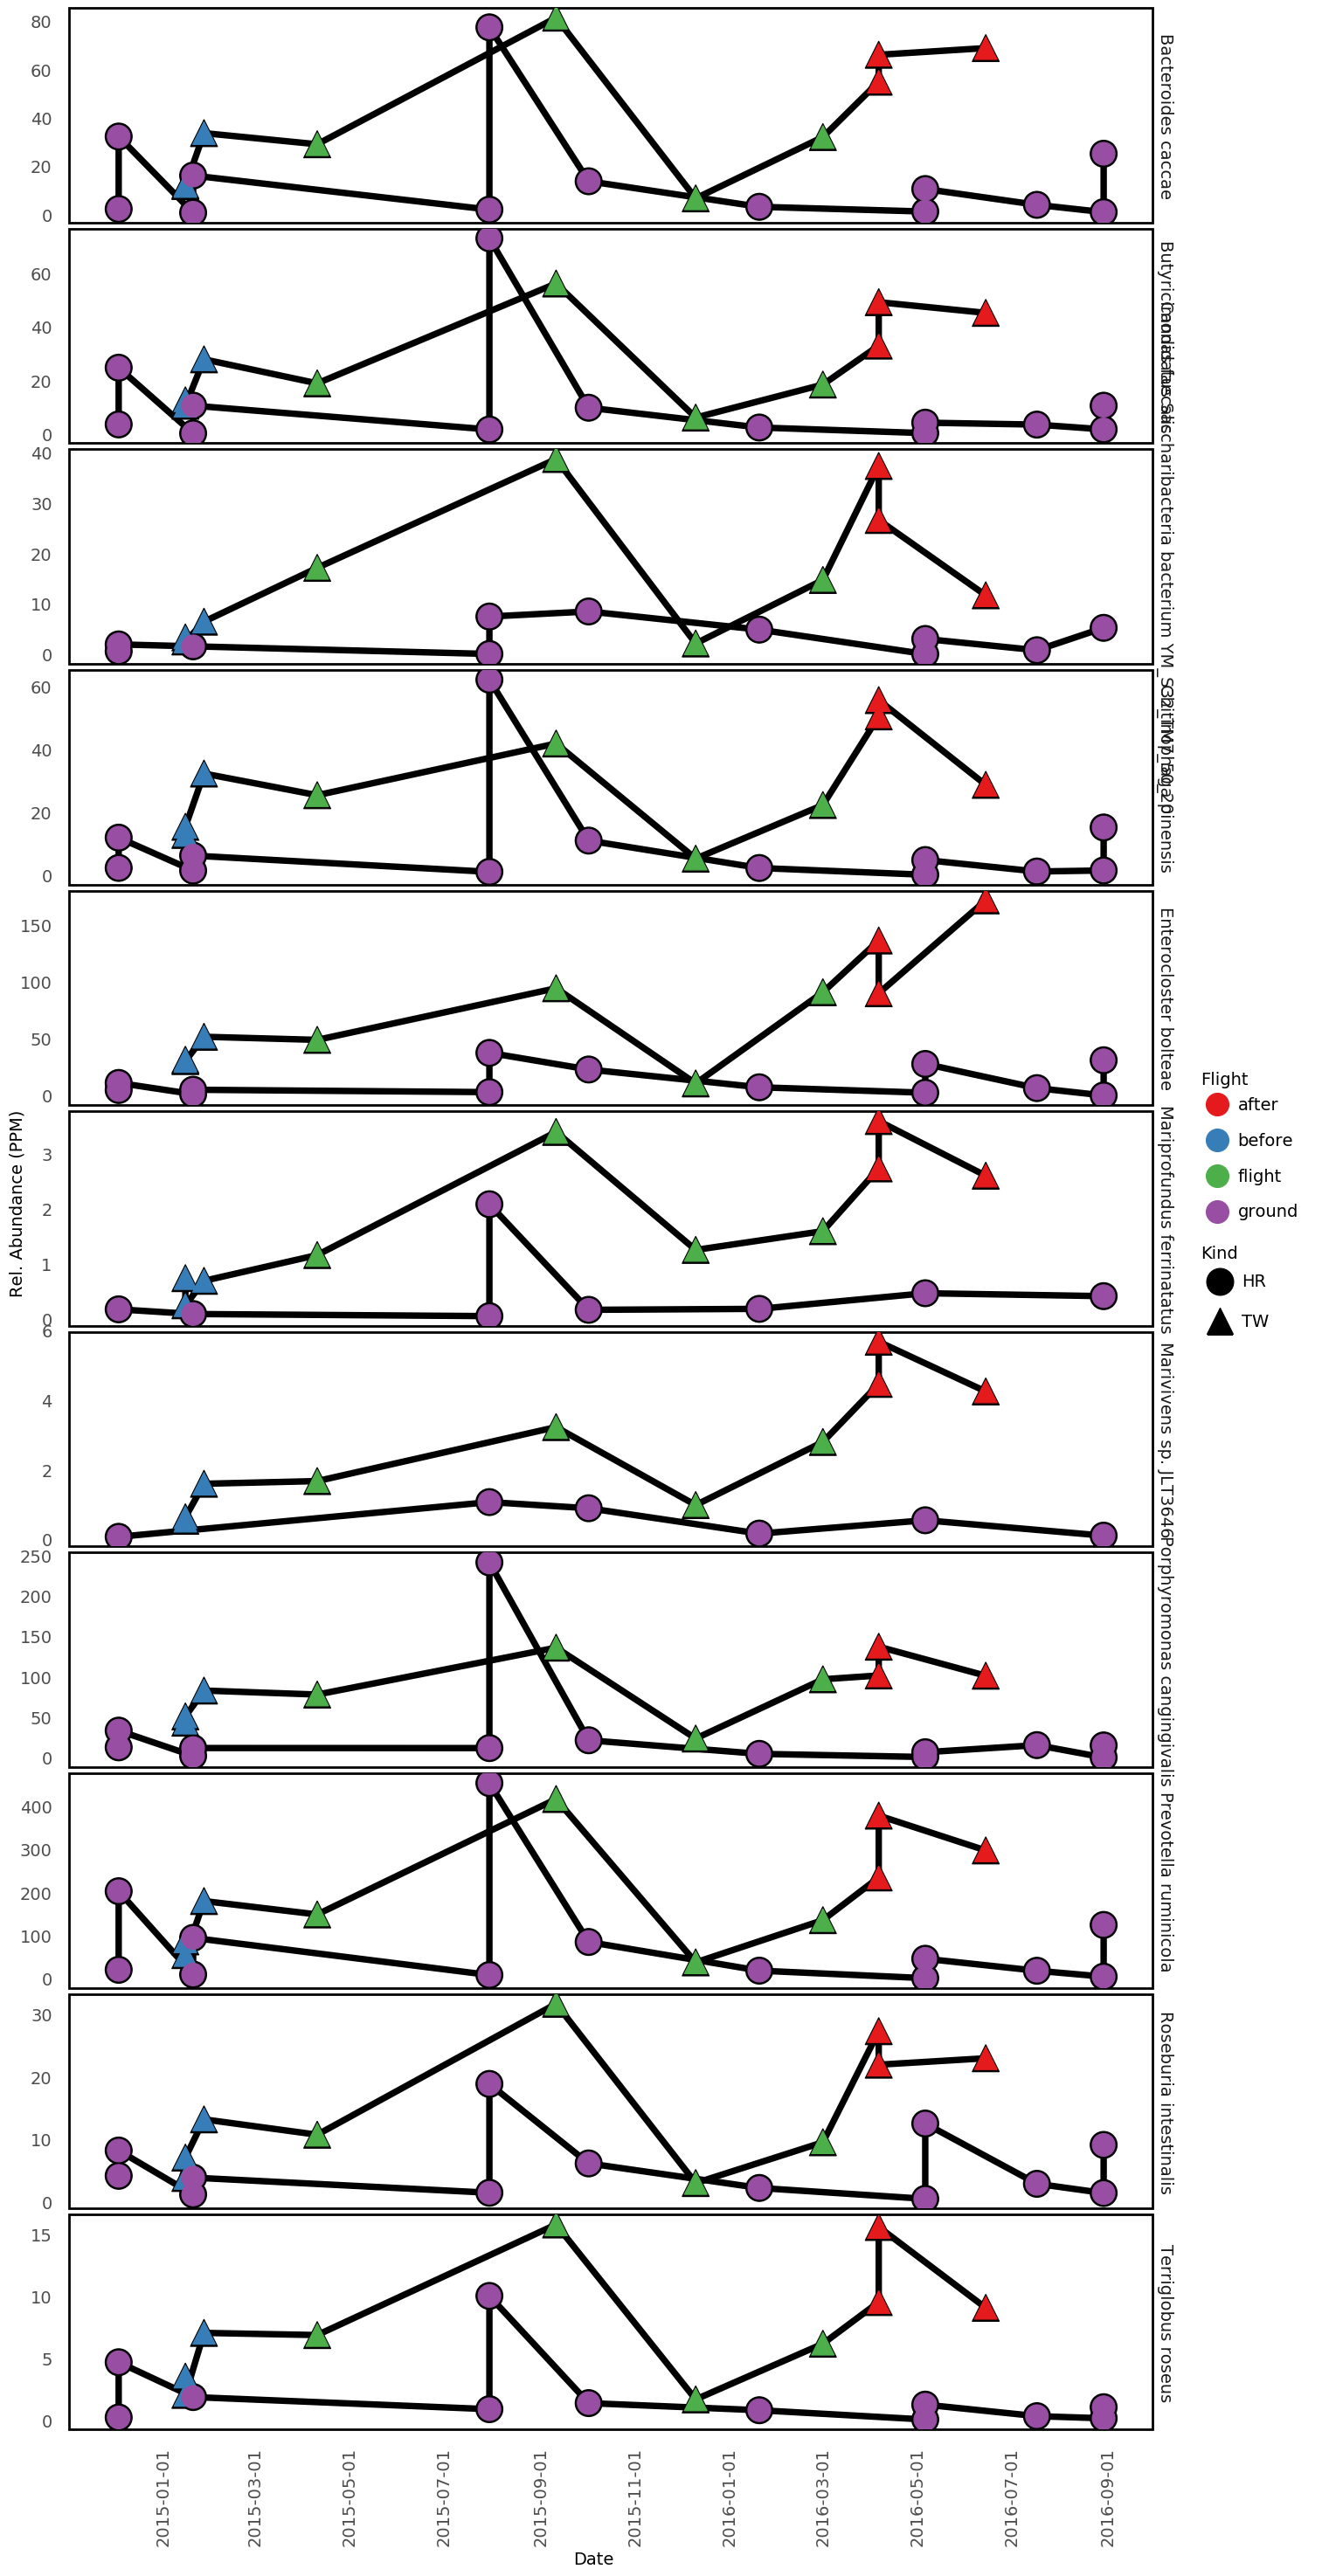

<ggplot: (8762996014056)>

In [37]:
figs.plot_twins_species_set(oral_persistent_taxa, kind=['saliva', 'buccal']) #+ theme(figure_size=(16, 8))

In [7]:
twin_rcs = figs.twins.taxa_read_counts()
twin_rcs = twin_rcs.fillna(0)
twin_rcs.columns = [c.split('s__')[1] for c in twin_rcs.columns]

transient = figs.metadata().query('kind == "fecal"')
transient = transient['flight']
transient = transient.map(lambda x: 'ground' if x != 'flight' else x)
transient_taxa = twin_rcs.loc[transient.index]
transient_taxa = transient_taxa.fillna(0)
transient_taxa = transient_taxa.loc[:,transient_taxa.sum() > 0]

transient_taxa

,Homo sapiens,Thermothielavioides terrestris,Thermothelomyces thermophilus,Neurospora crassa,Pyricularia grisea,Pyricularia oryzae,Pyricularia pennisetigena,Fusarium pseudograminearum,Fusarium venenatum,Fusarium graminearum,...,Lactococcus virus bIL170,Lactococcus virus P008,Lactococcus virus ASCC273,Lactococcus virus ASCC532,Leuconostoc virus P793,Escherichia virus K1ind1,Bacillus virus Spock,Pantoea virus Limezero,Columbid alphaherpesvirus 1,Melegrivirus A
MHV-HR1_S41667382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MHV-HR2_S41666347,4628.0,65.0,23.0,116.0,50.0,28.0,84.0,11.0,23.0,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MHV-HR3_S41658400,8923.0,49.0,30.0,80.0,30.0,37.0,62.0,17.0,18.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MHV-HR4_S41677053,3595.0,33.0,28.0,82.0,26.0,31.0,97.0,8.0,17.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MHV-HR5_S41659407,2769.0,41.0,19.0,66.0,15.0,11.0,29.0,13.0,9.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MHV-HR6_S41664399,2437.0,30.0,30.0,57.0,19.0,35.0,105.0,6.0,10.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MHV-HR7_S41668198,2736.0,41.0,20.0,92.0,24.0,15.0,65.0,10.0,15.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MHV-HR8_S41669183,2362.0,71.0,13.0,89.0,23.0,18.0,45.0,9.0,11.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MHV-HR9_S41667391,13400.0,48.0,15.0,89.0,17.0,19.0,51.0,4.0,13.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MHV-TW1_S41667392,2156.0,38.0,117.0,19.0,10.0,27.0,22.0,25.0,9.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
%%R -i transient_taxa -i transient

fecal_transient_taxa_aldex = aldex(t(transient_taxa), transient)

[1] "aldex.clr: generating Monte-Carlo instances and clr values"
[1] "operating in serial mode"
[1] "computing center with all features"
[1] "aldex.ttest: doing t-test"
[1] "running tests for each MC instance:"
|------------(25%)----------(50%)----------(75%)----------|
[1] "aldex.effect: calculating effect sizes"
[1] "operating in serial mode"


In [9]:
%%R -o fecal_transient_taxa

sig = fecal_transient_taxa_aldex[fecal_transient_taxa_aldex$we.eBH < 0.05,]
fecal_transient_taxa = rownames(sig[sig$effect < 0,])

In [10]:
fecal_transient_taxa = list(fecal_transient_taxa)
fecal_transient_taxa = [el.replace('.', ' ').replace('sp ', 'sp.') for el in fecal_transient_taxa]

fecal_transient_taxa[:5]

['Lactobacillus frumenti',
 'Tetragenococcus koreensis',
 'Exiguobacterium antarcticum',
 'Bacillus tequilensis',
 'Lysinibacillus sp. SGAir0095']

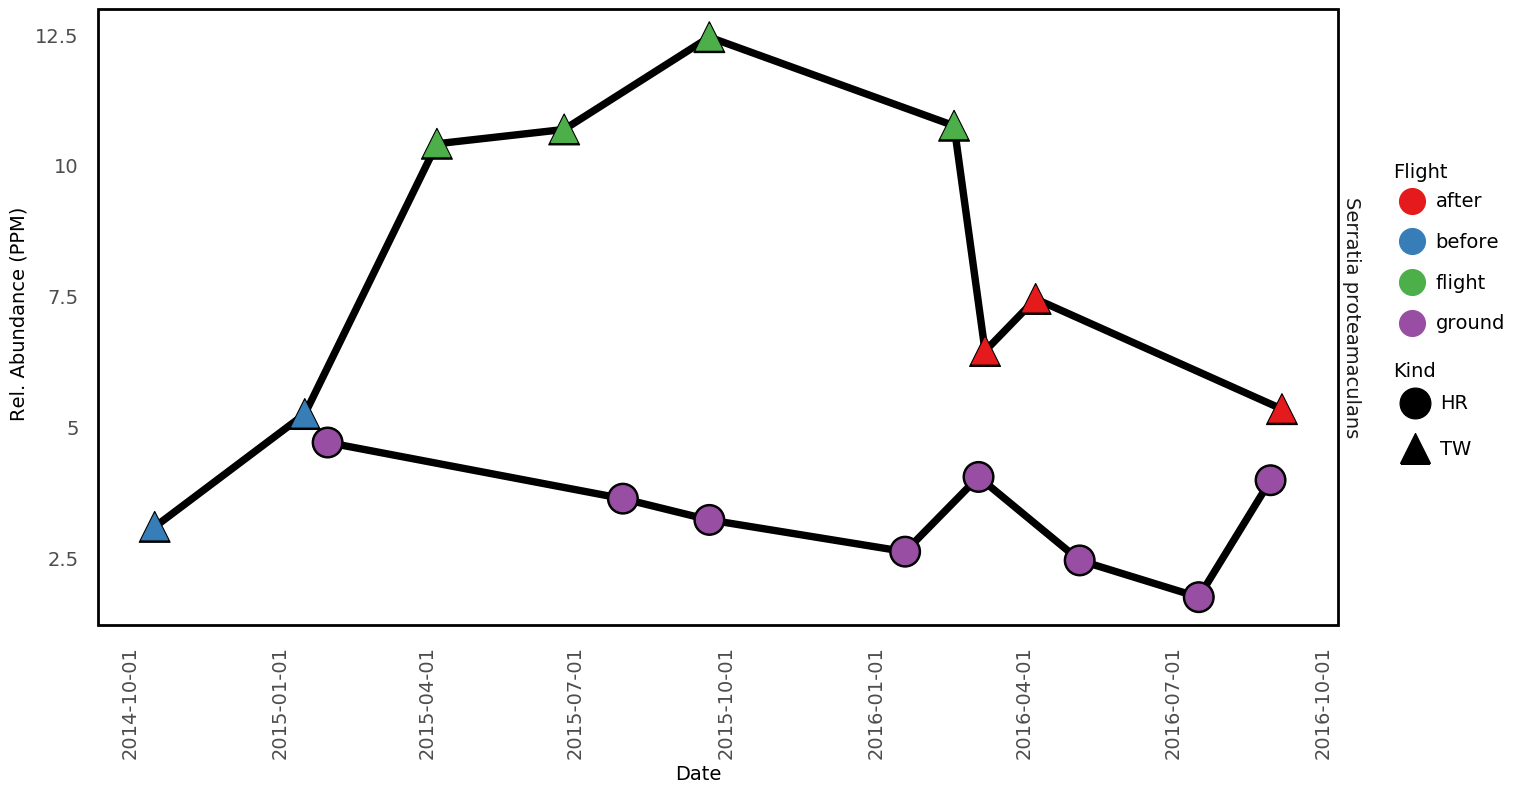

<ggplot: (8773662128097)>

In [42]:
figs.plot_twins_species_set(['Serratia proteamaculans']) + theme(figure_size=(16, 8))

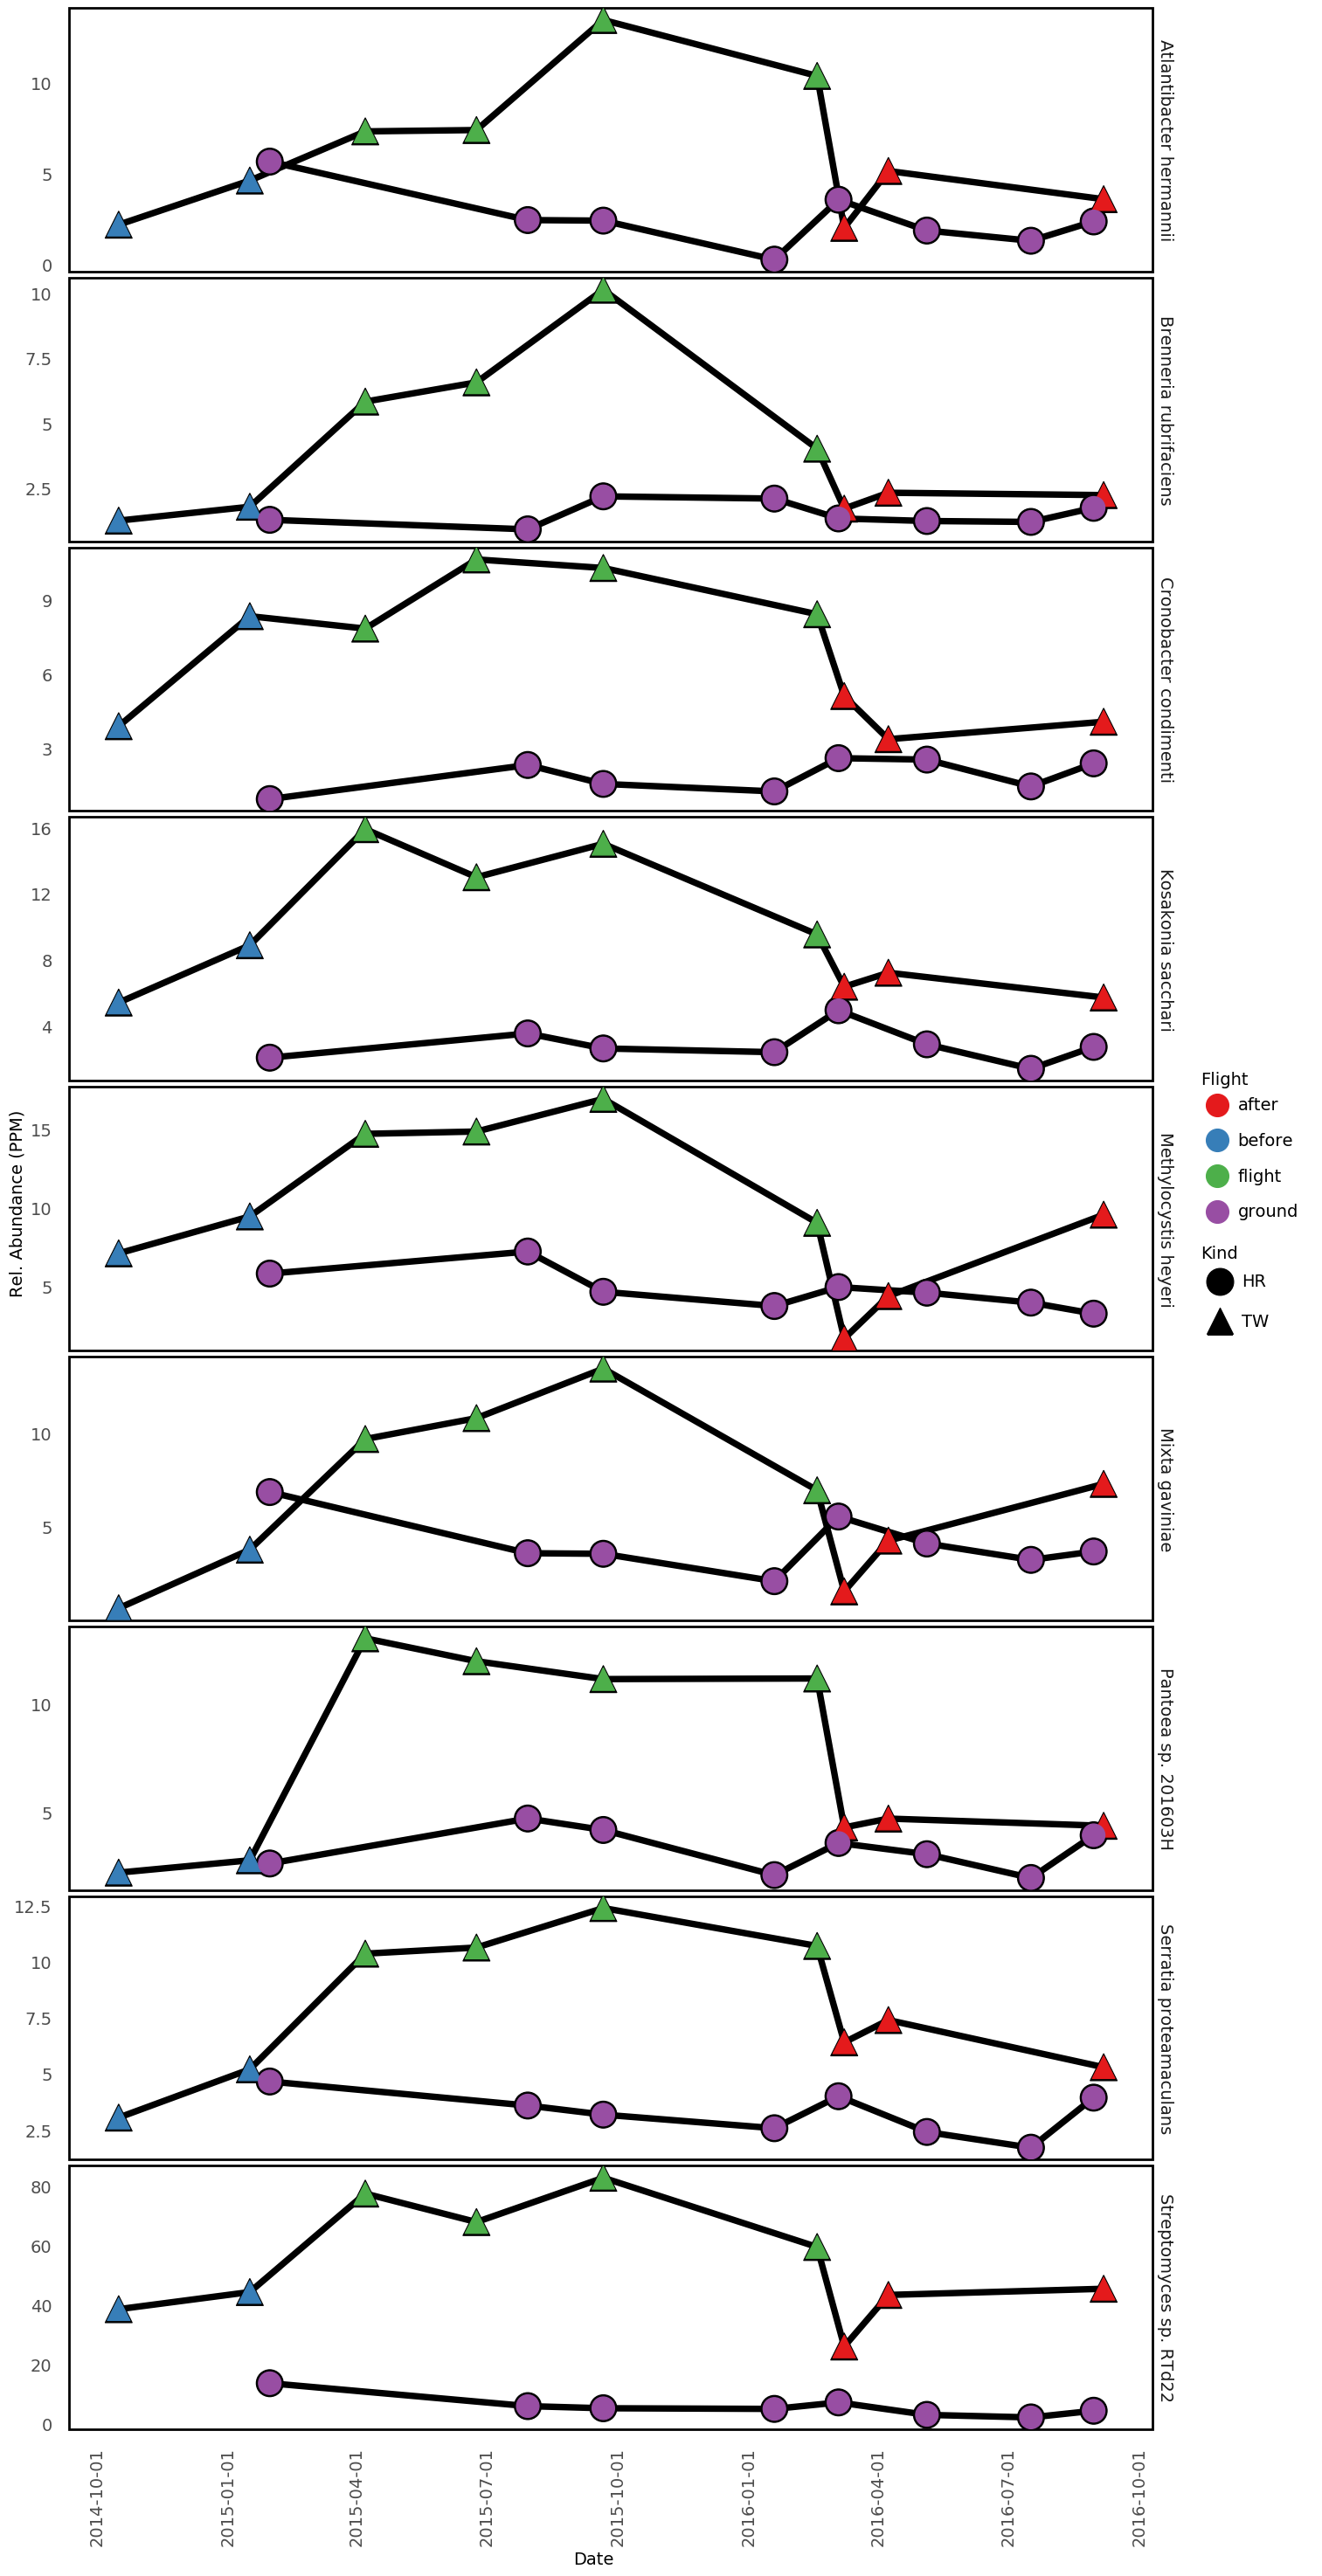

<ggplot: (-9223363263159021182)>

In [11]:
figs.plot_twins_species_set(set(fecal_transient_taxa) & figs.iss_species_set())

In [12]:
twin_rcs = figs.twins.taxa_read_counts()
twin_rcs = twin_rcs.fillna(0)
twin_rcs.columns = [c.split('s__')[1] for c in twin_rcs.columns]

persistents = figs.metadata().query('kind == "fecal"')
persistents = persistents['flight']
persistents = persistents.map(lambda x: 'ground' if x not in ['flight', 'after'] else 'persistent')
persistent_taxa = twin_rcs.loc[persistents.index]
persistent_taxa = persistent_taxa.fillna(0)
persistent_taxa = persistent_taxa.loc[:,persistent_taxa.sum() > 0]

persistent_taxa

,Homo sapiens,Thermothielavioides terrestris,Thermothelomyces thermophilus,Neurospora crassa,Pyricularia grisea,Pyricularia oryzae,Pyricularia pennisetigena,Fusarium pseudograminearum,Fusarium venenatum,Fusarium graminearum,...,Lactococcus virus bIL170,Lactococcus virus P008,Lactococcus virus ASCC273,Lactococcus virus ASCC532,Leuconostoc virus P793,Escherichia virus K1ind1,Bacillus virus Spock,Pantoea virus Limezero,Columbid alphaherpesvirus 1,Melegrivirus A
MHV-HR1_S41667382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MHV-HR2_S41666347,4628.0,65.0,23.0,116.0,50.0,28.0,84.0,11.0,23.0,34.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MHV-HR3_S41658400,8923.0,49.0,30.0,80.0,30.0,37.0,62.0,17.0,18.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MHV-HR4_S41677053,3595.0,33.0,28.0,82.0,26.0,31.0,97.0,8.0,17.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MHV-HR5_S41659407,2769.0,41.0,19.0,66.0,15.0,11.0,29.0,13.0,9.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MHV-HR6_S41664399,2437.0,30.0,30.0,57.0,19.0,35.0,105.0,6.0,10.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MHV-HR7_S41668198,2736.0,41.0,20.0,92.0,24.0,15.0,65.0,10.0,15.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MHV-HR8_S41669183,2362.0,71.0,13.0,89.0,23.0,18.0,45.0,9.0,11.0,20.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MHV-HR9_S41667391,13400.0,48.0,15.0,89.0,17.0,19.0,51.0,4.0,13.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MHV-TW1_S41667392,2156.0,38.0,117.0,19.0,10.0,27.0,22.0,25.0,9.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
persistents

MHV-HR1_S41667382        ground
MHV-HR2_S41666347        ground
MHV-HR3_S41658400        ground
MHV-HR4_S41677053        ground
MHV-HR5_S41659407        ground
MHV-HR6_S41664399        ground
MHV-HR7_S41668198        ground
MHV-HR8_S41669183        ground
MHV-HR9_S41667391        ground
MHV-TW1_S41667392        ground
MHV-TW2_S41668201        ground
MHV-TW3_S41666352    persistent
MHV-TW4_S41665304    persistent
MHV-TW5_S41659412    persistent
MHV-TW6_S41671226    persistent
MHV-TW7_S41665306    persistent
MHV-TW8_S41663403    persistent
MHV-TW9_S41659413    persistent
Name: flight, dtype: object

In [14]:
%%R -i persistent_taxa -i persistents

persistent_taxa_aldex = aldex(t(persistent_taxa), persistents)

[1] "aldex.clr: generating Monte-Carlo instances and clr values"
[1] "operating in serial mode"
[1] "computing center with all features"
[1] "aldex.ttest: doing t-test"
[1] "running tests for each MC instance:"
|------------(25%)----------(50%)----------(75%)----------|
[1] "aldex.effect: calculating effect sizes"
[1] "operating in serial mode"


In [15]:
%%R -o fecal_persistent_taxa

sig = persistent_taxa_aldex[persistent_taxa_aldex$we.eBH < 0.05,]
fecal_persistent_taxa = rownames(sig[sig$effect > 0,])

In [16]:
fecal_persistent_taxa = list(fecal_persistent_taxa)
fecal_persistent_taxa = [el.replace('.', ' ').replace('sp ', 'sp.') for el in fecal_persistent_taxa]

fecal_persistent_taxa[:5]

['Streptococcus pyogenes',
 'Lactobacillus hokkaidonensis',
 'Lactobacillus murinus',
 'Jeotgalibaca sp. H21T32',
 'Aerococcus urinaehominis']

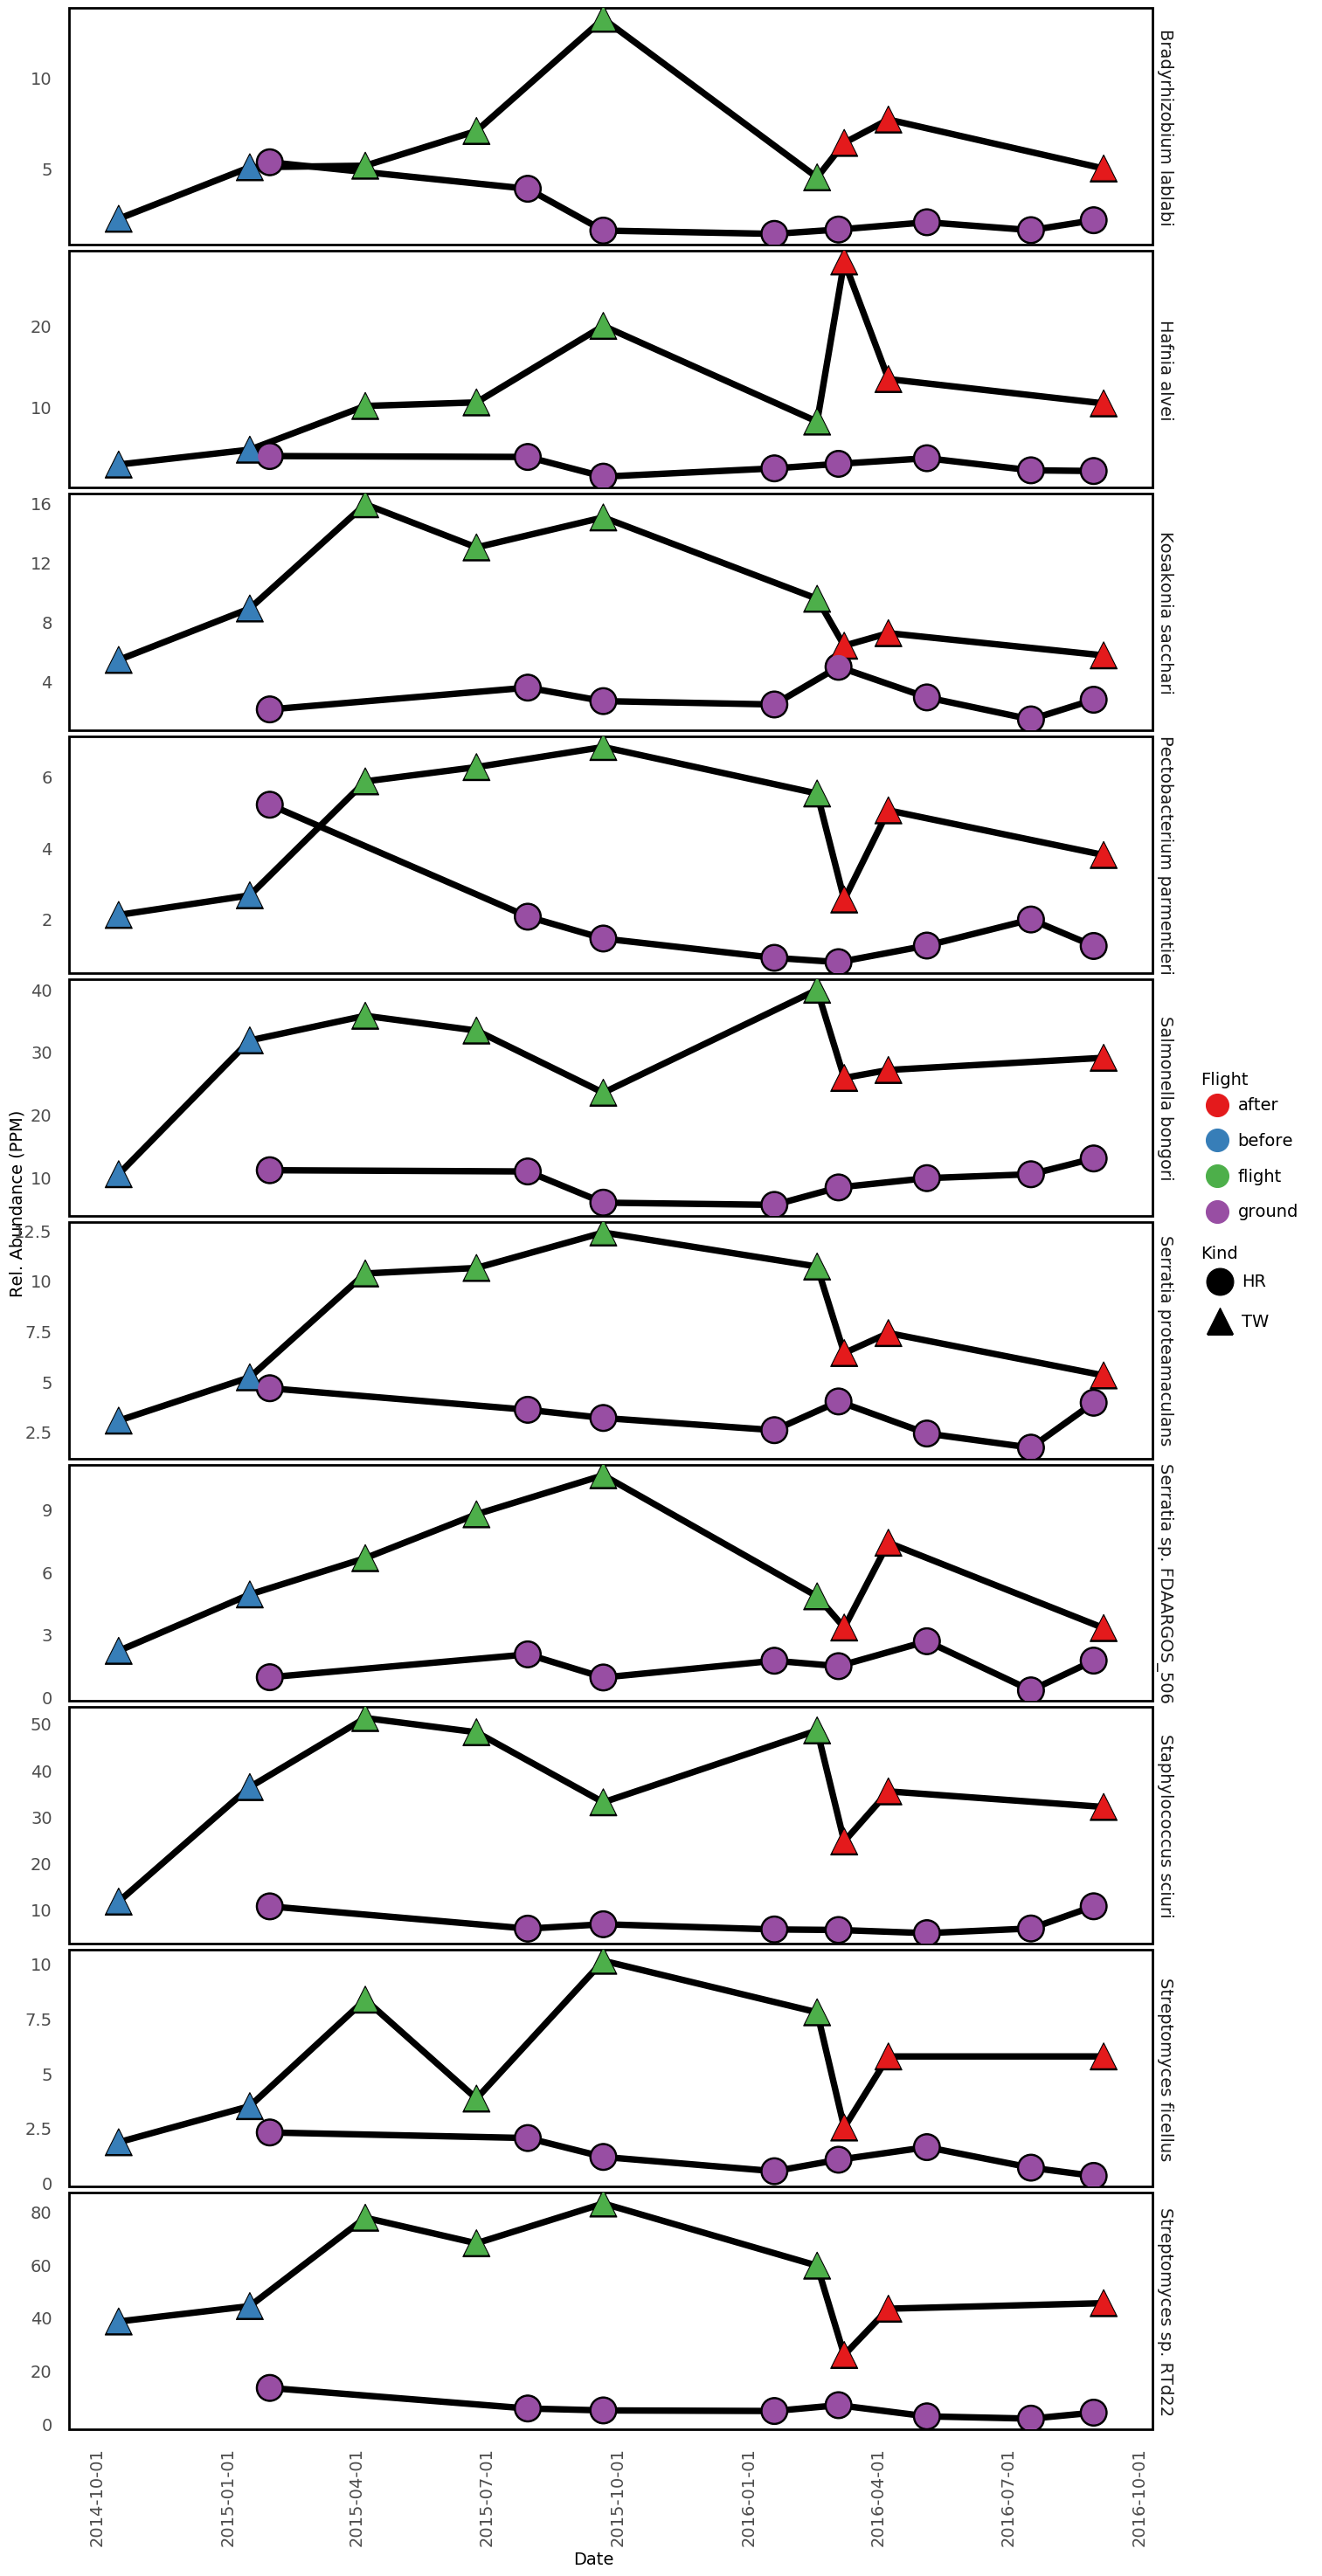

<ggplot: (8773695356259)>

In [17]:
figs.plot_twins_species_set(set(fecal_persistent_taxa) & figs.iss_species_set())

In [41]:
for el in set(fecal_persistent_taxa) | set(fecal_transient_taxa) | set(oral_persistent_taxa) | set(oral_transient_taxa):
    if len(el.split()) == 2:
        print(el)

Bacteroides caccae
Enterocloster bolteae
Leptotrichia hongkongensis
Roseburia intestinalis
Terriglobus roseus
Chitinophaga pinensis
Rothia aeria
Prevotella ruminicola
Porphyromonas cangingivalis
Mariprofundus ferrinatatus
Butyricimonas faecalis


In [59]:
for el in  set(oral_persistent_taxa) | set(oral_transient_taxa):
    if len(el.split()) == 2:
        print(el)

Neisseria elongata
Chryseobacterium indoltheticum
Aggregatibacter aphrophilus
Streptococcus viridans
Geminocystis herdmanii
Nonlabens dokdonensis
Rothia aeria
